# Problem Statement

About Company 

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [44]:
from pyforest import *

In [45]:
train = pd.read_csv("Loan_train.csv")

In [46]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
test = pd.read_csv("test_lAUu6dG.csv")

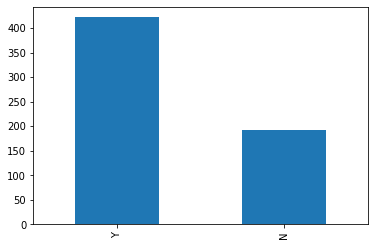

In [48]:
train.Loan_Status.value_counts().plot(kind="bar")

In [49]:
#68 % yes value
print("Loan approval ratio is",train.Loan_Status.value_counts()[0]/train.shape[0])

Loan approval ratio is 0.6872964169381107


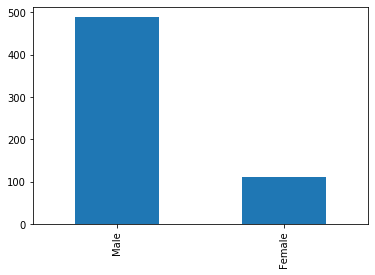

In [50]:
train.Gender.value_counts().plot(kind="bar")

In [51]:
#more males taking loan compared to females

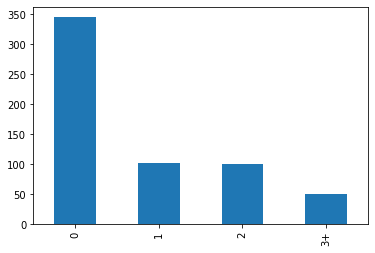

In [52]:
train.Dependents.value_counts().plot(kind="bar")

In [53]:
#3+ object -- replace it with 3
train.Dependents.replace(to_replace="3+", value = 3 , inplace= True)

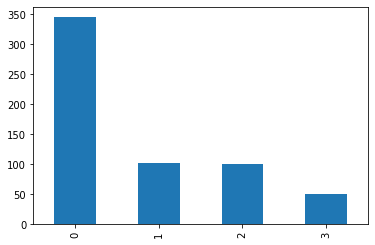

In [54]:
train.Dependents.value_counts().plot(kind="bar")

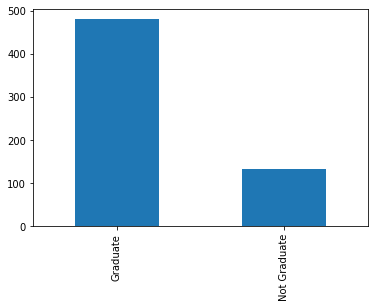

In [55]:
train.Education.value_counts().plot("bar")
#More graduates applying for loan

In [56]:
train.Self_Employed.value_counts()
#More Salaries people(no 500) in loans rather than self employed

No     500
Yes     82
Name: Self_Employed, dtype: int64

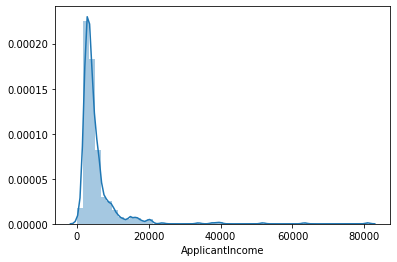

In [57]:
sns.distplot(train.ApplicantIncome)
plt.show()

#Income is scewked.

In [58]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

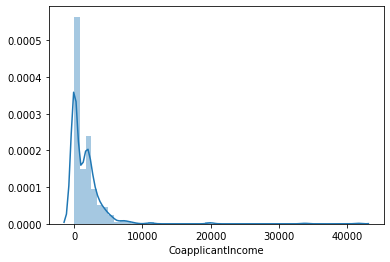

In [59]:
sns.distplot(train.
CoapplicantIncome)
plt.show()

#also in coapplicantincome is scewked

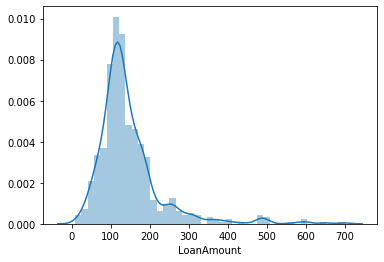

In [60]:
sns.distplot(train.LoanAmount.dropna()) #as missing values are there so temp. dropna

In [61]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [62]:
train.Loan_Amount_Term.value_counts()

#majority of customer 360months repayment

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [63]:
train.isnull().sum()[train.isnull().sum()!=0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [64]:
train.shape

(614, 13)

In [65]:
#Drop Nas
newtrain = train.dropna()

In [66]:
newtrain.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

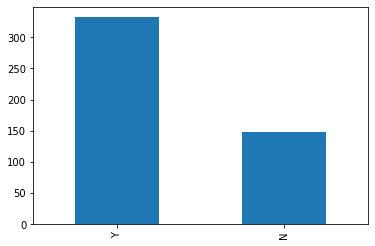

In [67]:
newtrain.Loan_Status.value_counts().plot(kind="bar")

#target variable balance

In [68]:
newtrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [69]:
#replace y and n
newtrain.Loan_Status.replace(to_replace=["Y","N"], value=[1,0], inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [70]:
newtrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [71]:
dummytrain = pd.get_dummies(newtrain.drop("Loan_ID",axis=1))

In [72]:
#split new train in train and test
from sklearn.model_selection import train_test_split
y= dummytrain.Loan_Status
x= dummytrain.drop("Loan_Status", axis=1)
#x= newtrain.drop(["Loan_Status","Loan_ID"], axis=1)

In [73]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25,random_state=123)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy")

In [75]:
rf.fit(xtrain,ytrain)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
pred = rf.fit(xtrain,ytrain).predict(xtest)

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

In [78]:
print("The Accuracy Score is {}".format(accuracy_score(ytest,pred)))
print("Cohens kappa {}".format(cohen_kappa_score(ytest,pred)))

The Accuracy Score is 0.7583333333333333
Cohens kappa 0.44515306122448983


In [79]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61        44
           1       0.76      0.89      0.82        76

    accuracy                           0.76       120
   macro avg       0.75      0.71      0.72       120
weighted avg       0.76      0.76      0.75       120



In [80]:
#as recall is 30 difference 52 and 88 data is inbalance

In [81]:
!pip install imblearn

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
s = SMOTE(ratio ="minority")


In [96]:
xtrain_reset,ytrain_reset = s.fit_sample(xtrain,ytrain)
xtest_reset,ytest_reset = s.fit_sample(xtest,ytest)


In [103]:
print(sum(ytrain[ytrain==1]))
print(sum(ytrain==0))

256
104


In [104]:
print(sum(ytrain_reset==0) )
print(sum(ytrain_reset==1))

256
256


In [105]:
print(sum(ytest_reset==1) )
print(sum(ytest_reset==0))

76
76


In [106]:
pred = rf.fit(xtrain_reset,ytrain_reset).predict(xtest_reset)

In [107]:
print("The Accuracy Score is {}".format(accuracy_score(ytest_reset,pred)))
print("Cohens kappa {}".format(cohen_kappa_score(ytest_reset,pred)))

The Accuracy Score is 0.8092105263157895
Cohens kappa 0.618421052631579
